In [35]:
import pandas as pd 
df=pd.read_csv(r"C:\Users\HP\Desktop\CARSD.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [36]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [37]:
final_data=df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [38]:
final_data["Current_Year"]=2021

In [39]:
final_data["Age"]=final_data["Current_Year"]-final_data["Year"]

In [40]:
final_data.drop(["Year"],axis=1,inplace=True)

In [41]:
final_data.drop(["Current_Year"],axis=1,inplace=True)

In [42]:
final_data=pd.get_dummies(final_data,drop_first=True)

In [43]:
final_data.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Age,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

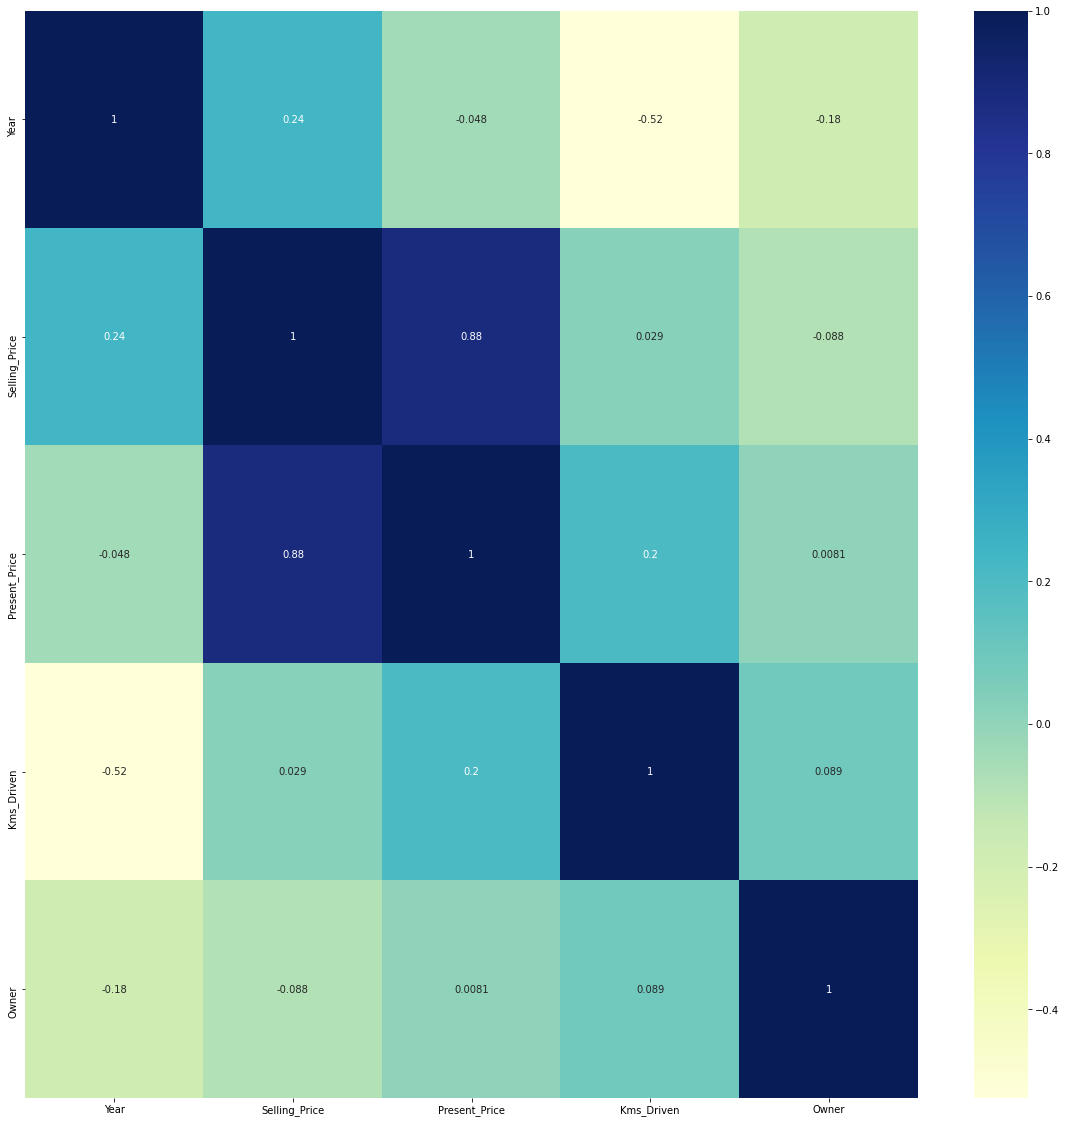

In [45]:
import numpy as np

import seaborn as sns
corrmat=df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="YlGnBu")

In [46]:
x=final_data.iloc[:,1:]
y=final_data.iloc[:,0]

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [48]:
sell_price=pd.DataFrame({"1.Before": y,"2.After": np.log(y)})

array([[<AxesSubplot:title={'center':'1.Before'}>,
        <AxesSubplot:title={'center':'2.After'}>]], dtype=object)

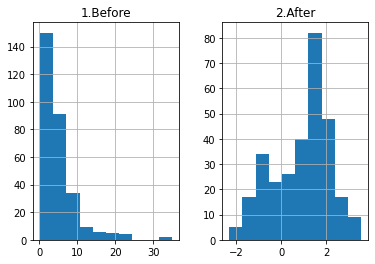

In [49]:
sell_price.hist()

In [50]:
#y=np.log(y)

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
print(x_train.shape , x_test.shape , y_train.shape, y_test.shape)

(210, 8) (91, 8) (210,) (91,)


In [52]:
#finding mean for test data values
base_pred=np.mean(y_test)
print(base_pred)

5.127802197802198


In [53]:
base_pred=np.repeat(base_pred,len(y_test))

In [54]:
base_root_mean_square_error=np.sqrt(mean_squared_error(y_test,base_pred));print(base_root_mean_square_error)

5.468643040839934


In [55]:
#setting intercept as True
lgr=LinearRegression(fit_intercept=True)
#model
model_lin1=lgr.fit(x_train,y_train)


In [56]:
#predicting on test set
cars_predictions_lin1=lgr.predict(x_test)

In [57]:
lin_msel=mean_squared_error(y_test,cars_predictions_lin1)
lin_rmsel=np.sqrt(lin_msel)
print(lin_rmsel)

2.105262042043132


<AxesSubplot:ylabel='Selling_Price'>

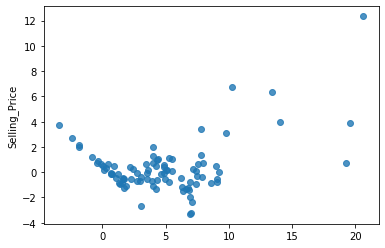

In [58]:
residuals1=y_test-cars_predictions_lin1
sns.regplot(x=cars_predictions_lin1,y=residuals1,scatter=True,fit_reg=False,data=final_data)


In [59]:
residuals1.describe()

count    91.000000
mean      0.343524
std       2.088553
min      -3.299154
25%      -0.723986
50%      -0.033482
75%       0.751903
max      12.341793
Name: Selling_Price, dtype: float64

In [60]:
from sklearn import metrics

In [61]:
print('MAE:', metrics.mean_absolute_error(y_test, cars_predictions_lin1))
print('MSE:', metrics.mean_squared_error(y_test,cars_predictions_lin1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, cars_predictions_lin1)))

MAE: 1.2426713915033707
MSE: 4.432128265667618
RMSE: 2.105262042043132


C:\Users\HP\anaconda7\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

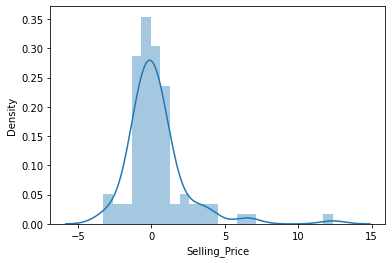

In [62]:
sns.distplot(y_test-cars_predictions_lin1)

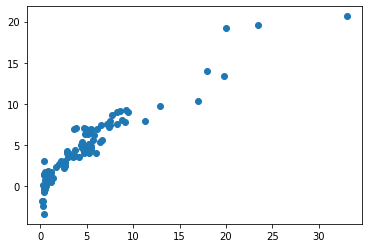

In [63]:
plt.scatter(y_test,cars_predictions_lin1)

In [64]:
print(cars_predictions_lin1)

[ 7.58040009 -0.3627605   4.31191003  8.98463298 14.04665091  4.89803855
  3.58761579  1.38619893  5.29991836  4.62106109  2.42286099  1.54852976
  5.07062421  7.38717702  8.6086708  13.4060192   7.17894816  4.277895
 -0.41524438  2.25574225  4.94795881  3.9771943   6.31506796  7.83735876
 -1.80958855  1.84400579 -0.78578961  0.7805503   0.02712534  6.89915356
  3.90531626  7.49276568  0.68801837  7.98584293  3.56487209  1.71924821
  5.52591789  7.08907897 -2.4345038   9.03780556  9.19963667 19.24628779
  4.43112145  3.98990672  6.77734378  9.77003063  0.12924726  1.6037066
  5.07902373  7.43070321  7.85803117  4.24368424  4.84437324 19.5767343
  1.66432568  1.23924673  0.29440446  2.15148086  3.46799882  0.89268384
  3.54348215  6.89957631  2.71396621 20.65820685  4.33506014  5.53139061
  9.0583691   7.04014227  3.06307506  2.74416957  3.97861002  3.02204504
  1.70321195  6.94537971 -1.86185846  4.02907692  0.66619051  7.79866495
 -3.42504813  2.98400525  1.30544105 10.29390991  6.343

<AxesSubplot:xlabel='Selling_Price', ylabel='Count'>

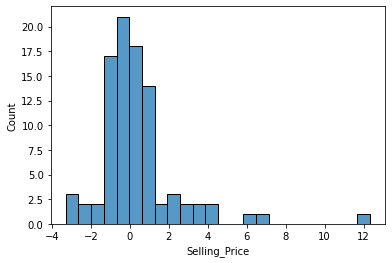

In [65]:
sns.histplot(y_test-cars_predictions_lin1)

In [66]:
model_lin1.score(x,y)

0.8786799371510838